# ECO225 Final Project

## Title: What factors determine the housing prices?

## Abstract:

The paper focuses on exploring the factors determine housing prices, and revealing a series of causations in the economics context. For accurate reasoning and analysis, summary statistics, map visualizations and multiple regression models are established. The paper identifies the differences in housing values by exploiting unique startups in California. The research shows housing features, income levels and economic factors influence housing prices, differences in the number of startups also have positive impacts on housing values.

## Part One: Introduction

## Introduction:

The world-wide acceleration of development in economies boosts people’s living conditions better than ever, which urges urbanization and city extensions to a greater extent. Under the situation, housing prices is one of the main products of various major economic events.  People pay attention to the cost of sheltering as their lives’ qualities are determined by that (Van Doorn et al., 1970). And price represents the standard level and goal they must achieve if they have high expectations for the future. Houses are risky assets with volatile prices (Picker 2006). Policy makers and economists are cautious on adjusting and determining the housing wealth, since the magnitude of volatility of housing wealth brings debates about change in housing prices bring uncertainties for the economy. Any changes in the housing values lead to changes in consumers’ behaviors, and have further influences on households’ consumptions due to wealth effect.(Pettinger & Robinson, 2021). The long-run consequences will be related to mortgage rates and income levels. The paper will draw further importance about the housing values with deeper analysis about higher housing values guarantee more investment opportunities.

The curiosity about how housing prices fluctuate as a result of changes in some economic factors, brings out this paper. There goes beyond no doubt the economic intuitions behind are obvious, investment rates ,income levels and characteristics play important role on determine the house values. However, economics analysis and findings should be rely on statistical and logical reasoning and economic facts. This paper enhance the idea and arguments with data analysis and visualization.

The goal is to present the discoveries about how the housing prices are determined, which will throw light on the predictions about housing prices. With relating concepts about micro and macroeconomics, various factors correlated with the housing prices will be revealed. The paper will also demonstrate the changes in housing prices will eventually predict differences in inflation, investments rates, and geographical inequalities between metropolitan and rural areas. For further relations between variables and exploration about causations, regression models will be established. The paper summary statistics and map visualizations for the web scraped data. Micro data can be useful because it allows the economists to examine every single potential factors relate with housing values change. The findings of this paper is income levels and housing characteristics  determine the housing prices, the regions with higher housing values bring the investment rates up. Investors take the advantage of geographical locations and local economy, bring more business startups. Housing market run into monopolistic competitions where they need to higher the costs, price levels and housing values increase ultimately. The result will be meaningful in the sense that housing prices can be predictable and observable, and enable people to choose the kinds of cities to live in according to their preferences. Policy makers and economists can make further economic assumptions and relations based on the result.

## Part Two: Previous Projects

## Project One

The data is drawn from 1990 U.S. Census about housing prices in California in 1990, the data provided the information about the location of the houses, latitudes, longitudes, housing ages, and population and households within in each block, as well as households' incomes. 

## Import libraries

(<span style = 'color : red'>Comment 3: Make sure to suppress redundant output. <br></span>Improvement: I delete the redundant output.)

In [3]:
%%capture
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg
import geopandas as gpd
from shapely.geometry import Point
import requests
from bs4 import BeautifulSoup



import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

%matplotlib inline
import qeds
qeds.themes.mpl_style();
! pip install bokeh
!pip install linearmodels
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'geopandas'

### Reading data

In [4]:
# Reading and observing the dataset.
df = pd.read_csv("housing.csv")
df = pd.DataFrame(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


There are 10 columns in the dataset, which means there are 10 attributes. 

Among all the variables, i want to focus on housing_Median_Age, avg_capacity, total_Rooms, ocean_Proximity, median_Income as my independent variables, and median_House_Value as my dependent variable. The following points introduce descriptions for all the variables.

<b>Independent variable:<b/>

- Longitude: The longitude of block .

- Latitude: The latitude of a block.

- median_house_age: median age of a house within a block. 

- total_rooms: total number of rooms within a block.

- total_bedrooms: total number of bedrooms within a block.

- population: total number of people within a block.

- households: total number of households within a block.

- median_income: median income for households within a block, measured in tens of thousands of US Dollars.

- oceanProximity: location of the house compared with ocean.

I define a new varibale called 'avg_capacity', which equals to total rooms devide the total households within a block.

- avg_capacity: average capacity of a house within a block, how many households can be accomodated within a house. It equals to total rooms divided by households.

<b>Dependent variable:<b/>

- median_house_value: Median housing prices for households within a block, measured in US dollar

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


After checking the information about the dataset, except for ocean_proximity is object, the rest of the attributes are either floats or integers. 

We also get to know that there are 20433 non-null counts for total_bedrooms, we can further check if there are other missing values in the dataset.

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

As we can see, there are no other missing data.

Since total_bedrooms is not my concern in this report, so i will clean it in the next part.

### Clean data

(<span style = 'color : red'>Comment 3: Make sure to only include tables that are directly relevant to your research. What value does this one add?<br></span>Improvement: I deleted the code for showing the dataframe after i cleaned it, and add more explanations for explaining my extra output in the next line)

In [7]:
#There i created a new dataframe with only the variables i care about.
df1 = df.drop(['total_bedrooms'], axis = 1)

In [8]:
#Creating new variable called 'avg_capacity'.
df1['avg_capacity'] = df.total_rooms / df.households

I created a new variable called 'avg_capacity' to measure the rooms per household within a block, since households are concerned about their family size and housing prices.

### Summary Statistics

In this part, i will present some tables and statistics to explore and explain the data, and further explain the <span style = 'color : red'>relationship between housing features, households' incomes and house values. </span>

Firstly, the housing prices summary statistics:

In [9]:
df1['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Median households' incomes summary statistics:

In [10]:
df1['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

By comparing these two dataframes, i can draw some conclusions:

- The mean for housing prices is 206855 US dollars, the mean for households' incomes were 38706 US dollars.

- The highest median income among households was 150000 US dollars, the highest median housing price was 500001 US dollars.

In [11]:
#I created a dataframe 2 for showing the mean of median housing 
#prices categorized by ocean_proximity
df2 = df1[["ocean_proximity","median_house_value"]].groupby(
    "ocean_proximity").mean().rename(columns = {
    "median_house_value" : "mean_medianHouse_value"})
df2

,mean_medianHouse_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


Housing price was the highest on the island, lowest in inland. And it got more expensive when the blocks were closer to the ocean.

In [12]:
#I created a dataframe 3 to show the avergae capacity of houses 
#within a block categorized by ocean_proximity.
df3 = df1[["ocean_proximity","avg_capacity"]].groupby(
    "ocean_proximity").mean()

In [13]:
df3

,avg_capacity
ocean_proximity,
<1H OCEAN,5.152576
INLAND,5.977265
ISLAND,5.656577
NEAR BAY,5.221705
NEAR OCEAN,5.206008


From table above we can observe <span style='color:red'>no </span> big differences in average capacity between each category. However, Inland or Island blocks offered slightly larger spaces than near the ocean. This makes sense, since there are more spaces for building construction in inland areas compared with near the ocean.

In [14]:
df4=df1["ocean_proximity"].value_counts()
df4

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

This dataframe summarizes total number of houses in different areas in California, among which the number of houses living 1 hour less than ocean was the highest, accounting for 9136.

<b>I will further specifically present histograms and scatterplots to show the distribution of those areas and how housing prices differ in these regions in next part.</b>

In [15]:
#I created dataframe 5 so that i can merge to make comparisons later.
df5 = df1[["ocean_proximity","median_income"]].groupby(
    "ocean_proximity").mean().rename(columns = {
    "median_income" : "mean_medianIncome"})
df5

,mean_medianIncome
ocean_proximity,
<1H OCEAN,4.230682
INLAND,3.208996
ISLAND,2.744420
NEAR BAY,4.172885
NEAR OCEAN,4.005785


In [16]:
#I created dataframe 6 to show the average population in each 
#ocean_proximity category.
df6 = df1[["ocean_proximity","population"]].groupby(
        "ocean_proximity").mean()
df6

,population
ocean_proximity,
<1H OCEAN,1520.290499
INLAND,1391.046252
ISLAND,668.000000
NEAR BAY,1230.317467
NEAR OCEAN,1354.008653


In [17]:
# Concating the dataset to obtain the information about the
#differences in houses categorized by ocean_proximity.
pd.concat([df4,df3,df6,df2,df5],axis=1).rename(columns = {
    "ocean_proximity" : "Number_of_houses", 
    "population":"avergae_population"})

,Number_of_houses,avg_capacity,avergae_population,mean_medianHouse_value,mean_medianIncome
<1H OCEAN,9136,5.152576,1520.290499,240084.285464,4.230682
INLAND,6551,5.977265,1391.046252,124805.392001,3.208996
NEAR OCEAN,2658,5.206008,1354.008653,249433.977427,4.005785
NEAR BAY,2290,5.221705,1230.317467,259212.311790,4.172885
ISLAND,5,5.656577,668.000000,380440.000000,2.744420


Main findings of the table:

- Most of the people lived 1 hour less near the ocean, and average income in that area was the highest. Although the average capacity of the houses were limited, those people only had to pay the second lowest housing prices(240084 US Dollars).


<span style='color:blue'>Economic intuitions: </span>We know housing prices got higher when near the ocean, households were willing to bare the high opportunity costs of living 1 hour less than ocean, they did not want to spend lots of money even if their incomes were relatively high. 

- Housing prices did not necessarily increase as the houses can accomodate more people (higher avg_capacity). I will show this result with a diagram in the next part.

### Visualization and interpretation 

In this part, i mainly want to explain the following relationships through visualizations

- households' median incomes and housing prices
- Housing ages and housing prices
- Total rooms and housing prices
- The distances away from the ocean and housing prices

Firstly, i will show all the distribution of my independent and dependent variables respectively

(<span style = 'color : red'>Comment 4: Missing x and y axis labels on graph<br></span>Improvement: I divided my combined 5 histograms into 5 seperate bigger histograms with axis labels and title.)

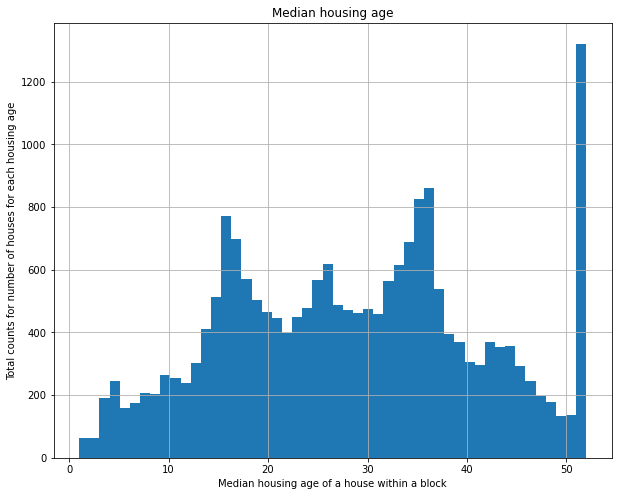

In [18]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (10,8))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median housing age of a house within a block')
plt.ylabel('Total counts for number of houses for each housing age')
plt.title('Median housing age')
plt.show()

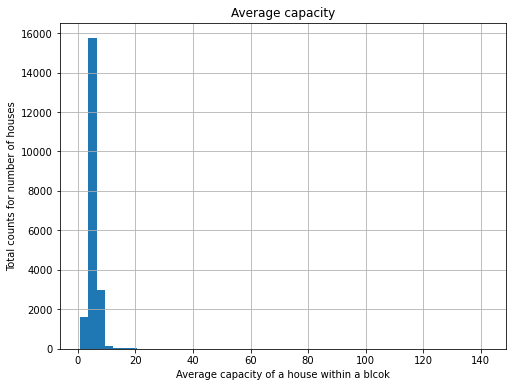

In [19]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['housing_median_age'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Average capacity of a house within a blcok')
plt.ylabel('Total counts for number of houses')
plt.title('Average capacity')
plt.show()

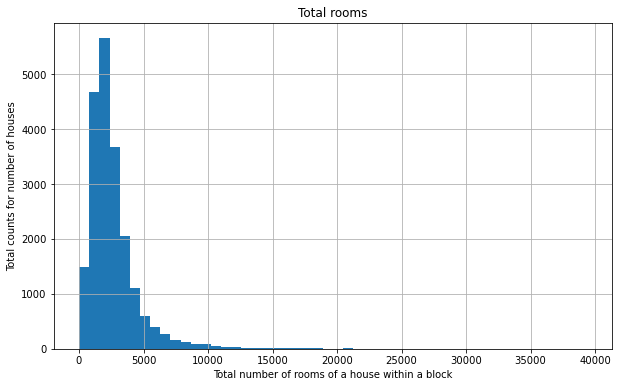

In [20]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['housing_median_age'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (10,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Total number of rooms of a house within a block')
plt.ylabel('Total counts for number of houses')
plt.title('Total rooms')
plt.show()

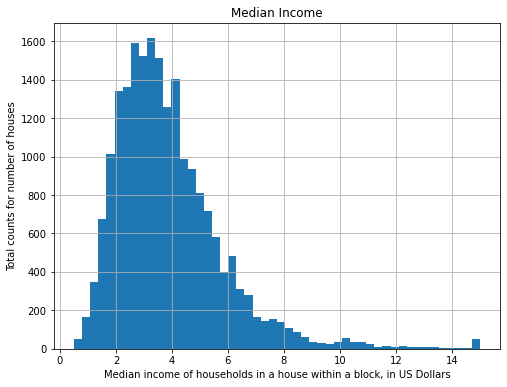

In [21]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['housing_median_age'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median income of households in a house within a block, in US Dollars')
plt.ylabel('Total counts for number of houses')
plt.title('Median Income')
plt.show()

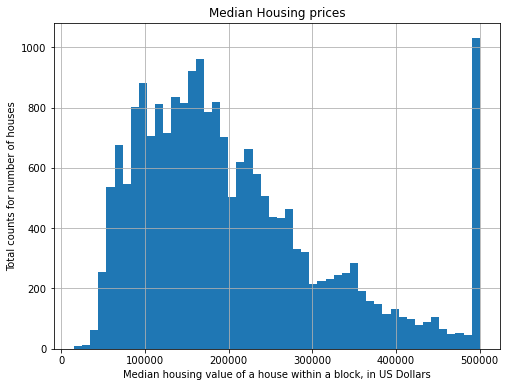

In [22]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['housing_median_age'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median housing value of a house within a block, in US Dollars')
plt.ylabel('Total counts for number of houses')
plt.title('Median Housing prices')
plt.show()

The histograms above suggest the following facts:

- The distribution of housing median age was quite uniform, there were lots of houses aged above 50 years.
- The distribution of total rooms was right-skewed, most of the blocks contained around 3000 rooms.
- The distribution of median income was also right-skewed, most of the households got income around 25000 US dollars.
- The distribution of median house values was slightly right-skewed, most of the housing prices were around 100000 to 200000 US dollars, however, there were above 1000 houses worthed about 500000 US dollars.

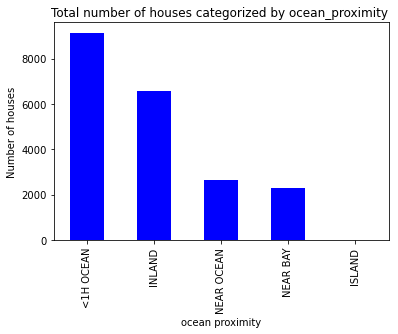

In [23]:
#Creating the histogram to show the distribution of the number of houses in each ocean_proximity category.
df1.ocean_proximity.value_counts().plot(kind = "bar",color = 'blue')
plt.title('Total number of houses categorized by ocean_proximity ')
plt.xlabel('ocean proximity')
plt.ylabel('Number of houses')
plt.show()

The histogram above shows the distribution of total number of houses in each ocean_proximity category, as i mentioned ealier, the number of houses living 1 hour less than ocean was the highest.

(<span style = 'color : red'>Comment 5 and 6: Main title is missing on graph<br></span>Improvement: Added titles for all graphs.)

[]

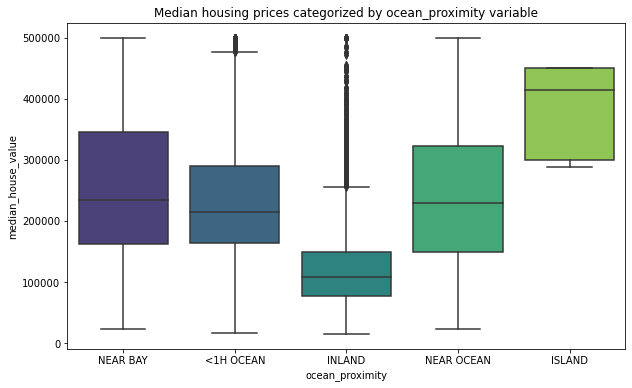

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.title('Median housing prices categorized by ocean_proximity variable')
plt.plot()

This boxplot clearly illustrates that the housing prices were the highest on island, and prices got higher when it was closer to the ocean.

<b>Next, i will illustrate the relationship between housing values and median incomes of households.</b>

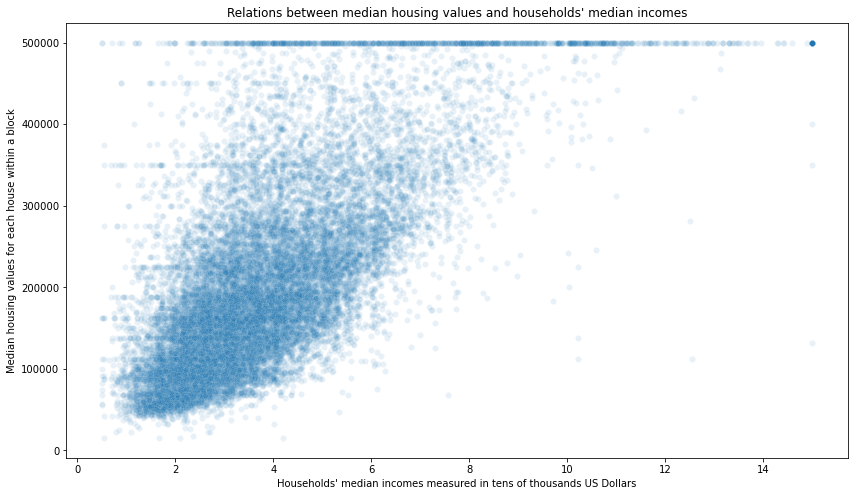

In [25]:
#ploting scatterplot to link income levels and housing values.
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'median_income', y = 'median_house_value', data = df1, alpha = 0.1)
plt.title("Relations between median housing values and households' median incomes")
plt.xlabel("Households' median incomes measured in tens of thousands US Dollars")
plt.ylabel("Median housing values for each house within a block")
plt.show()

From the scatterplot above we can see:

- Households mainly bought houses with around 50000 to 300000 US values.
- For those households who mainly bought 50000 to 300000 US dollars houses, their incomes were around 10000 to 60000 US dollars.
- Some of the households with income more than 40000 US dollars bought houses at 500000 US dollars.
- When households got even richer with above 80000 US Dollars, they will focus on the houses with the highest value.
- As households' incomes increase, they would buy more expensive houses, houses were <span style='color:red'>normal </span> good for those people.

(<span style = 'color : red'>Comment 7: Graph not informative<br></span>Improvement: Showing the relations between housing prices and housing ages with heat map.)

A efficient and direct way to help us observe the relations between housing prices and housing ages is to plot <b>heat map<b/>.

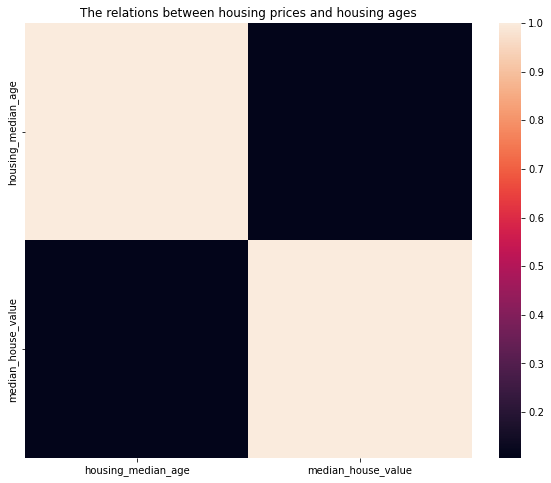

In [26]:
plt.figure(figsize=(10,8))
plt.title("The relations between housing prices and housing ages")
corr = df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)
plt.show()

The heat map illustrates that: black means there are 0 relation between two variables. 

Thus, we can clearly see that there were <span style='color:red'>no </span> big differences in housing prices categorized by median housing ages, which means housing prices would not increase even if the buildings were newly constructed. 

<span style='color:blue'>Economic intuitions: </span> This situation is related with households' preferences, some people prefered newly constructed houses, while the others thought aged buildings were more reliable and safe.

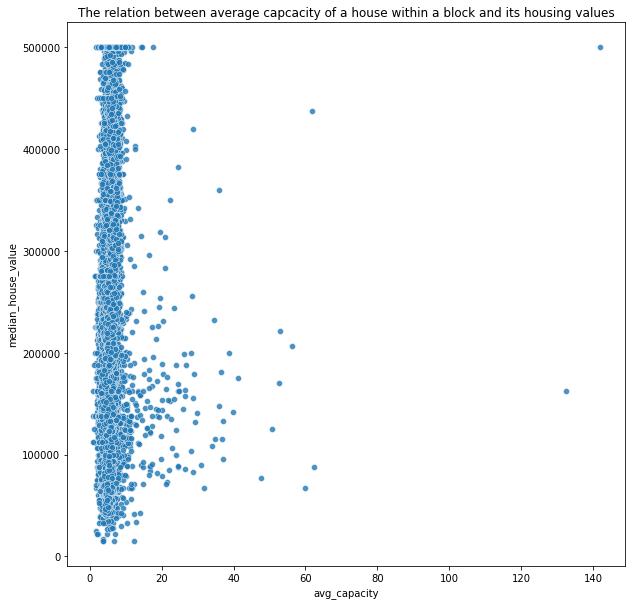

In [27]:
#ploting scatterplot to link average capacity and housing values.
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'avg_capacity', y = 'median_house_value', data = df1, alpha = 0.8)
plt.title("The relation between average capcacity of a house within a block and its housing values")
plt.show()

- The average of the housing capacity was around 5, which means there were 5 rooms for each household in the block.
- However, the housing prices varied at capacity of 5, which means more rooms per household did not indicate higher housing prices, houses with more average capacity do not cost more.

# Project Two

### THE MAIN MESSAGE

<span style = 'color : red'>Improvement: revise the main message from the overall project<br></span>

The main message of the project is that: <b>Characteristics of houses and income levels of households determine the housing prices, potential natural hazards like earthquake prevent housing prices increase even higher in urban areas. The number of startups also play an important role in determining the housing prices.  <b/>

### Main Message Plots

In this section, i will mainly introduce hover map to reveal the relationship between housing prices and income levels of households. To be more specific, households with higher income were living in the more urban areas where housing prices were relatively high. With the hover map, this help us to compare some details more clearly.

<b>Pre-work for Visualization:<b/>

- Since the distribution of median housing values and income levels in California is my main focus, i want to choose a visualization that highlights this aspect of the data. hover map is one of the most effective ways to demonstrate the relationship of my variables. The x-axis is the longitude and y-axis is the latitude, each colored region represents the counties in California. I will then need to find a way to demonstrate different housing prices and income levels in each geographical locations, my natural solution is to demonstrate the each housing price and income level using different colors. And, to what extent the color approaches to red represents how higher the income level is, and darker blue color represents lower income level. With hover map, we can see housing price in every county.

<span style = 'color : red'>Improvement: Using hover map instead of two scartterplots to represent the relationships between income levels and median housing values<br></span>

In [28]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
from bokeh.palettes import brewer, Spectral6
output_notebook()
import json


#wi_geojson=GeoJSONDataSource(geojson=df8.to_json())
#color_mapper = LinearColorMapper(palette = Spectral6, low = 2.007337, high =  5.435702)
#color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
#                     border_line_color=None,location = (0,0), orientation = 'horizontal')
#hover = HoverTool(tooltips = [ ('County','@NAME'),('Median Income', '@median_income'),('median_house_value', '@median_house_value')])
#p = figure(title="Distribution of median income for each county in California", tools=[hover])
#p.patches("xs","ys",source=wi_geojson,
#          fill_color = {'field' :'median_income', 'transform' : color_mapper})
#p.add_layout(color_bar, 'below')
#show(p)

Loading BokehJS ...

NameError: name 'df8' is not defined

- I included the median income level in tens of thousands US Dollars 

<b>Interpretations:<b/>

  - From previous summary statistics, the mean median housing price was 206855.816909 US Dollars. When i divided the total map(total blocks in California) into two groups, i will call the regions with housing prices above 206855.816909 US Dollars as the more urban areas, and the rest as the not relatively urban. Then we will see that most of the regions were not relatively urban, housing prices were below average, and they were typically located on the inland. Some of households were urban and comfortable to live, housing prices were above average, they were typically near the ocean. To see the distribution of housing values with respective to ocean_proximity, i will present maps in <b> next part<b/>.

  - From previous summary statistics, the mean median income level was 3.870671 tens of thousands of US Dollars. When i divided the general map(total blocks in California) into two groups, i will call the households with incomes above 3.870671 tens of thousands of US Dollars as the rich, and the rest as the not rich. Then we will see that most of the households had income below averages, represented in blue, and they were typically located on the inland. Very few of the households were rich, represented in red, they were typically near the ocean. To see the distribution of housing values with respective to ocean_proximity, i will present maps in <b> next part<b/>.
 

- To summarize these two scatterplots, we can definitely have an intuition and observation when we see the values in the hover map. With the same latitude(37) and longitude(-122) in the axes, we can see that regions near that area were in red, which means that both income levels and housing prices were above average and higher. In other words, households with higher income levels will purchase more expensive houses.

- The counties with high income levels and high housing prices are Marin, San Mateo, Santa Clara, Ventura, Orange. These findings will be useful in project Three.

## Map Visualization

In this part, i will firstly introduce my external data, then merging the external data with my own dataset(housing dataset). After that, i will get the map of California, then present the distribution of median housing prices, population and income levels with interesting maps to better express my main message. 

I also find other datasets. One about the business startups in US is from the kaggle(https://www.kaggle.com/datasets/justinas/startup-investments) and the other one is about the population growth rate from 2010 and 2022 from this website(https://worldpopulationreview.com/us-counties/states/ca)

In this part, i will also map the distribution of the number of startups in different counties in California in 21 century, as well as the income levels and housing prices at those regions with the business startups.

### Reading data

<span style = 'color : red'>Improvement: I suppressed and deleted all the redundant and unnecessary outputs and parts of my code<br></span>

When i tried to get the map of California, i thought it was better to map the cities in California rather than only a frame or structure of California, so i searched for external datasets. I put the links for my external dataset at the end of my project. I Mainly got two external datasets, first one is from US Census’s website, where i can get the map for each state and each county in United States. The second one is the latitudes and longitudes of all the cities in California.

In [29]:
# Dataset from US census website, about the boundries of each state and county in United States.
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
# state_df is about the geographical locations of each state in California, i will find the code for California 
# and get the general map of California
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
#county_df is about the shapefiles of each counties in Calfironia, i can show the boundaries in California and plot 
# the exact structure of counties with this dataset.


CA_city = gpd.read_file('cal_cities_lat_long.csv')
# Dataset from Kaggle 
#(https://www.kaggle.com/camnugent/california-housing-feature-engineering?select=cal_populations_county.csv)
# About the latitudes and longitudes of all the cities in California.

NameError: name 'gpd' is not defined

There i noticed that the type of longitude and latitude in CA_city is object, i will need to covert them into numerical variables.

There are no missing values for my state_df and county_df.

There i noticed i have 459 missing values for geometry in CA_city, but i will not need 'geometry' variable.

### clean Data

In [ ]:
# Convert the type of latitude and longitude variables into numerical.
CA_city['Latitude'] = pd.to_numeric(CA_city['Latitude'])
CA_city['Longitude'] = pd.to_numeric(CA_city['Longitude'])

I will transform the city data frame to a geo data frame

In [ ]:
CA_city["Coordinates"] = list(zip(CA_city.Longitude, CA_city.Latitude))
CA_city["Coordinates"] = CA_city["Coordinates"].apply(Point)

Below, we will be working with the state of California's shapefile (county_df) and will try to merge in a data that only has long,lat for some cities and no county information (CA_cities) using our overlay method. then, using the EPSG number, we can create a GeoDataFrame and then easily merge it to our shapefile.

In [ ]:
CA_city_gdf = gpd.GeoDataFrame(CA_city, crs = 4269, geometry="Coordinates") 
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
CA_county = county_df.query("STATEFP == '06'")

After that, merging the CA_city_gdf and CA_county

In [ ]:
#City_County_merge1 = gpd.sjoin(CA_city_gdf, CA_county, op="within")
#City_County_merge1

Now we have longitudes and latitudes for each city in California

Below, i merge the CA_county with my original dataset from project one.

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df_gdf = gpd.GeoDataFrame(df, crs = 4269, geometry = "Coordinates")
df_merge = gpd.sjoin(df_gdf, CA_county, op = "within")

Since my focus is the distribution of income levels and population, so i will merge with county_df with these two variables added.

I create a dataframe called df7 to get the information about the name of counties, median income level , population and median housing prices in each county

In [ ]:
df7 = df_merge[["NAME","median_income","population","median_house_value"]].groupby("NAME").mean()

In [ ]:
df8 = county_df.merge(df7, left_on="NAME", right_on="NAME", how="inner")

I create a dataframe to store the infomation of the information about the name of counties, median income level , population and median housing prices in each county, and with the geometry of each county, i can plot the map with this dataframe

From two information above, it shows that i merged the datasets successfully. Since there are 58 counties in California, and we got the information about the average population, average median income and median housing prices in each county.

##### Next, i want to go to the mapping part

To map the distribution of income levels, population and housing prices across the California, we can first get an overview about the general map of California. So that we can compare the distribution map with the actual California map to see if we make any mistakes, like the wrong latitudes and longitudes.

In [30]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

#for x, y, label in zip(City_County_merge1['Coordinates'].x, City_County_merge1['Coordinates'].y, City_County_merge1['Name']):
#    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')
plt.show()

NameError: name 'gpd' is not defined

Nice! we got the general map of California, so all the maps we get to map later, we can check with this map to see if there are any mistakes of the structure.

Now, we can plot the map with indications of income levels for each counties in California

In [ ]:
df8 = county_df.merge(df7, left_on="NAME", right_on="NAME", how="inner")
fig, gax = plt.subplots(figsize = (10,10))

state_df[state_df['NAME'] == 'California'].plot(ax=gax, edgecolor="black", color="white")

df8.plot(
    ax=gax, edgecolor='black', column='median_house_value', legend=True, cmap='RdBu_r',
    vmin=51000, vmax=360000
)

# Add text to let people know what we are plotting
gax.annotate('Housevalue',xy=(0.68, 0.06),  xycoords='figure fraction')

plt.axis('on')

plt.show()

- From the map above, we can clearly see that housing prices were really high when households lived near the ocean, especially with latitude 38 longitude -122, and latitude 34 longitude -118.
- This is <b>consistent</b> with my previous findings in project one, Housing prices were the highest on island, and lowest on inland. Starting from inland areas, it got more expensive when near the ocean.

In [ ]:
# county_df data cleaning
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

Now we can see the demographical features of each county.And compare the distribution of housing prices based on the comparisons about population

In [ ]:
# Plotting map for distribution of population
df8 = county_df.merge(df7, left_on="NAME", right_on="NAME", how="inner")
fig, gax = plt.subplots(figsize = (10,10))

state_df[state_df['NAME'] == 'California'].plot(ax=gax, edgecolor="black", color="white")

df8.plot(
    ax=gax, edgecolor='black', column='population', legend=True, cmap='RdBu_r',
    vmin=371.000000, vmax=1977.528912
)

# Add text to let people know what we are plotting
gax.annotate('population',xy=(0.68, 0.06),  xycoords='figure fraction')

plt.axis('on')

plt.show()

- Population is one of my important independent variables, so i created a map for the distribution of mean population in each county in California
- This dataframe summarizes total number of houses in different areas in California, among which the number of houses living 1 hour less than ocean was the highest, accounting for 9136.
- The south part of Calfifornia was more crowded, and it got even more crowded when the location is closer to the ocean.

###  This is consistent with my previous findings:

- First of all, the county which has color closer to red, it represents higher income levels, higher population and higher housing prices. And county with lower income levels, lower population and lower housing prices were represented in blue.
- To compare the two maps above and one hover map at the beginning of Project 2, we can see that the regions at latitude 38 longitude -122 and latitude 34 longitude -118 had the highest income levels compared with other regions. The same pattern can be applied with the distribution of housing prices and population density. 
- Besides, income levels got higher when it was closer to the ocean. The economic intuitions behind this are: Firstly, it's about people's preferences, people with higher income levels prefered to live near the ocean either in the old times or recent years. They will also have to pay more expensive housing prices, but they might find those are the comfortable places for them. Secondly, a large number of people choose to live about one hour less than the ocean, they have decent wages and they will pay relatively less housing prices.
- Some interesting points: As we know, Orange, Santa Clara, Marin, San Mateo and Los Angeles counties are very urban and popular in United States, from the map, we can see the income levels and housing prices were high, even nowadays. This indicates that people with higher income levels have higher expectations about their lifestyles, so they would choose to live in these urban areas with high cost.

###  Some further analysis:

- What i have done so far was finding the relationships between the income levels and housing prices, we can indeed intuitively get the idea that higher income levels anticipate hihger housing prices, and houses valued more when they were closer to the ocean. And in this paper, there it supported our intuitive ideas with valid data analysis and proof.
- Now, i am able to say housing prices are determined based on each housing characteristics, and it is reasonable to argue that housing prices are determined by income levels, since only when income levels get high, can the households purchase the houses with high costs.
- Besides, i have already found the geographical locations are related with housing prices, it is the ocean proximity of the locations. However, i think it is also reasonable to worth mentioning another important factor of geographical feature, which is the frequencies of earthquake. So in next part, i will further explore the relationships between the frequencies of the earthquake and housing prices.
- With reference about economic analysis, houses are the assets and investments of individuals, they are the wealth for them. When the values of houses increase, due to wealth effect, they are relatively richer, and income levels would be corelatively increase. Would there be a connection between investment opportunities and housing prices? In the next part, i will demonstrate that.
- For the purpose of exploring the relationships between the investment opportunities and housing prices, it is important to note that the housing prices growth rate will remain the same pattern in the future compared with the past (Collins, 2022). So that i will assume that all housing prices growth rate in each county in California will remain the same pattern, i will hold other economic factors the same, by excluding the inflation rate, etc.

# Project Three

The third project is the one missed to be graded, due to medical reasons i did not receive any comments.

In this part, i will mainly explore the relationships between the number of starups and housing prices.

To do that, same as previous projects, i will get the external datasets and information. Then clean and describe them.

### Reading data

In [ ]:
# There, i found another dataset which is about the population growth rate of each county in California 
#between 2010 and 2022.
# the link is https://worldpopulationreview.com/us-counties/states/ca

# I create df30 to store the information of all the population growth rates
df30 = pd.read_csv("pop.csv")
df30 = pd.DataFrame(df30)
df30['CTYNAME'] = df30['CTYNAME'].str.replace(r'County', '')
df30 =df30.sort_values('CTYNAME', ascending=True)
df30.rename(columns = {'CTYNAME':'NAME'}, inplace = True)
df30=df30.drop(['pop2022', 'popDensity'], axis=1)
# Create df31 to store the growth rate for each county
df31=df30.groupby(by=["NAME"]).mean()

In [ ]:
#Create df10 for store the startups dataset from kaggle
df10 = pd.read_csv("offices.csv")
# create df11 to store the startups only in California
df11 = df10.loc[(df10.state_code == 'CA')]
#df11.loc[df11.latitude == 0.000000, 'latitude'].count()
# The above code is for count the number of starups with no information on locations


Since i found there are missing information for lots of the starups in California, so the code below is to clean the dataset and only keep the startups with geographical locations in California in 21 century.

### Clean data

In [ ]:
df12 = df11.loc[(df11.latitude != 0.000000)]

Clean the latitude and longitude in df12 to get the float version of data

In [ ]:
df12['latitude'] = pd.to_numeric(df12['latitude'])
df12['longitude'] = pd.to_numeric(df12['longitude'])


Get the coordinates information for each startup

In [ ]:
df12["Coordinates"] = list(zip(df12.longitude, df12.latitude))
df12["Coordinates"] = df12["Coordinates"].apply(Point)

Next, i found the most relevant picture from this link(https://www.kaggle.com/camnugent/california-housing-feature-engineering), so that i can use this general map of California to see where the startups located at with accuracy.

In [ ]:
# Donwloading and reading the image of the general map of California
california_img=mpimg.imread('California.png')

With the scartterplot and image of California, i can see where those startups in California located at.

### Visualization about the locations of startups

In [31]:

df12.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7),
                cmap=plt.get_cmap('jet'))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend() 
plt.show()

NameError: name 'df12' is not defined

- Firstly, From the scartterplot and reference of image of California, we can now observe the locations of startups in California.
- Secondly, it is obvious that regions at latitude 38 longitude -122 and latitude 34 longitude -118 had the most number of startups compared with other regions. 
- Recall from previous project where i compare the income levels, population density and housing prices in each county, i also plotted three seperate maps, and get the following findings: At the same two regions (regions at latitude 38 longitude -122 and latitude 34 longitude -118), compared with other regions, the housing prices were the highest, population density was the highest, income levels of households were also the highest.
- When combining all the relations, we might be able to intuitively get the idea that for those regions with large amount of business startups, the housing prices and income levels are relatively high.

### Clean data

There, i aim to create a dataframe to store the information of latitudes and longitudes of each startup in California, then purpose of doing that is to merge the startups dataset with my original dataset, so that i can see the median housing values and income levels for these startups locations.

In [ ]:
df13= df12['latitude']
df14 = df12['longitude']

df14 = np.trunc(100 * df14) / 100
df13 = np.trunc(100* df13) /100
df13=pd.DataFrame(df13)
df14 = pd.DataFrame(df14)
df15 = pd.concat([df13, df14], axis=1)

There, i create dataframe df_merge2 to merge my original housing dataset with the startups dataset, now i am able to see the information of areas with those startups.

In [ ]:
# get the coordinates for each startups
df15['latitude'] = pd.to_numeric(df15['latitude'])
df15['longitude'] = pd.to_numeric(df15['longitude'])
df15["Coordinates"] = list(zip(df15.longitude, df15.latitude))
df15["Coordinates"] = df15["Coordinates"].apply(Point)

# get the county information and create gdf for dataframe 15
df15_gdf = gpd.GeoDataFrame(df15, crs = 4269, geometry="Coordinates") 
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
CA_county = county_df.query("STATEFP == '06'")


df_merge1 = gpd.sjoin(df_gdf, df15_gdf, how='inner')
df_merge1 = df_merge1.drop(['index_right'], axis=1)
#Merging the dataframes df_merge1 with my original dataset, df_merge2 represents for the housing information of all 
#startups in CA
df_merge2 = gpd.sjoin(df_merge1, CA_county, how='inner')
df_merge2 = df_merge2.rename(columns={'longitude_left': 'longitude', 'latitude_left': 'latitude'})

Now i got the locations and housing information for each startup in California.
However, i can not see the relationship between the number of startups and housing prices, income levels, so i think it is a good idea to get the number of startups for each county, then i am able to visualize it and compare the information

In [ ]:
# Creating dataframe 25 to store the number of startups in each county
df25 = df_merge2.groupby(['NAME'])['NAME'].count()
df25 = pd.DataFrame(df25)
df25.rename(columns = {'NAME':'startups'}, inplace = True)

Create dataframe (df16) to store the information about the median income, population and median housing value in each county with startups.

In [ ]:
df16 = df_merge2[["NAME","median_income","population","median_house_value"]].groupby("NAME").mean()

Notice i only have 31 observations in df25, which means i only have the information about the number of startups in 31 counties in California, but there are 58 counties, so it is reasonable to leave those counties as 0. Since no observations means there are no startups at that time.

Besides, for those counties without startups, i also have no information about the median incomes and housing prices. I can not simply use the information before, since now i am detecting the counties with startups, the stories and data are different if those counties have startups, so i would leave median income and population as missing for the purpose of accuracy.

In [ ]:
data = {'NAME': ['Yuba', 'Alpine', 'Amador', 'Calaveras','Colusa','Del Norte','Glenn','Imperial','Inyo','Lake','Lassen','Mariposa','Mendocino','Merced','Modoc','Mono','Monterey','Plumas','San Benito','Shasta','Sierra','Siskiyou','Stanislaus','Sutter','Tehama','Trinity','Tuolumne'], 
        'median_income': [None,None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
        'population':[None,None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
        }  
df20 =pd.DataFrame(data)

The code above i created a dataframe contains the missing values for the remained 27 counties with no startups.

In [ ]:
# get the mean dataframe of df20 so that i can merge in the next step.
df20 = df20.groupby('NAME').mean()

Now, with the population growth rate in each county, median income and housing prices for the counties with startups, as well as the population of each county, i am able to merge them all in a single dataframe so that i can visualize them as a whole.

In [32]:
#Create the dataframe (df32) to store all the information for the counties with startups.
df32 = pd.merge(df26.reset_index(),df31.reset_index(),left_index= True, right_index=True)
#df32=pd.merge(df21, df31, left_on="NAME", right_index=True)
df32.rename(columns = {'NAME_x':'NAME'}, inplace = True)
df21=pd.concat([df16, df20], axis=0)
#dfstap=pd.concat([df21, df25], axis=1)
#df21 = df21.sort_values('NAME', ascending=True)
# Creating a dataframe contains the same information with df32, but with "NAME" as the index
df21 =df21.sort_values('NAME', ascending=True)

NameError: name 'df26' is not defined

Don't forget the general map of California, we can check with this map to see any mistakes on the latitude and longitudes.

In [ ]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '06'")
fig, gax = plt.subplots(figsize=(10, 10))

state_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")

#for x, y, label in zip(City_County_merge1['Coordinates'].x, City_County_merge1['Coordinates'].y, City_County_merge1['Name']):
#    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

In [ ]:
# Plot the map about the distribution of median income levels for the counties with startups
df22 = county_df.merge(df21, left_on="NAME", right_on="NAME", how="inner")

df22 = df22.fillna(value=0)
fig, gax = plt.subplots(figsize = (10,10))

state_df[state_df['NAME'] == 'California'].plot(ax=gax, edgecolor="black", color="white")

df22.plot(
    ax=gax, edgecolor='black',column='median_income', legend=True, cmap='RdBu_r',
    vmin=0.00, vmax=5.6
)

gax.annotate('Income',xy=(0.70, 0.06),  xycoords='figure fraction')

plt.axis('on')
plt.show()

- From this map, i can see the distribution of income levels of households in each county with startups.
- We can see there are lots of regions with high blue color, those are the regions with no startups, so that the median income levels are counted as missing in this scenario. For the purpose of visulization, Prof K suggests i directly replace the missing values with 0, so that we can only care about the regions with startups, and compare the income levels more clearly.
- It is obvious that regions at latitude 38 longitude -122 and latitude 34 longitude -118 had the highest income levels compared with other regions. 
- Which is consistent with the findings as before, with more number of startups in the regions, the income levels are related high.

Now, i will try to plot all the information of each county in California. To be more specific, i want to compare the income levels, the number of startups, population growth rate and housing prices for those counties with startups.

In [ ]:
#Creating dataframes to store the all the mentioned information for each county.
df26=pd.merge(df21, df25, on="NAME")
df26=pd.concat([df26, df20], axis=0)

df26 =df32.sort_values('NAME', ascending=True)
df26 = df26.drop(['GrowthRate_y','NAME_y'], axis=1)
df26.rename(columns = {'GrowthRate_x':'GrowthRate'}, inplace = True)
df27 = county_df.merge(df26, left_on="NAME", right_on="NAME", how="inner")

# Fill the missing values in the number of startups category as 0
df27['startups'] = df27['startups'].fillna(value=0)


In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
from bokeh.palettes import brewer, Spectral6
output_notebook()
import json


wi_geojson=GeoJSONDataSource(geojson=df27.to_json())

In [ ]:
color_mapper = LinearColorMapper(palette = Spectral6, low = 1, high =  100)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@NAME'),('Median Income', '@median_income'),('Startups', '@startups'),('median_house_value','@median_house_value'),('growth_rate','@GrowthRate')])
p = figure(title="Distribution of median income for each county in California", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'startups', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

- The map visualizes all the information for the counties with startups, notice there were only 31 observations for the counties in California in 2007, and on observations simply indicate there are no startups in the remained 27 counties in California at that time.
- The indicator represents red regions as more number of startups, and blue regions as less or no startups. Notice that although the max level of the indicator is 100, there are lots of regions above 100 and even reach a thousand.
- Those regions are, San Diego: 430 startups, Los Angeles:2892 startups, Orange:314 startups, Santa Barbara:66 startups, Santa Clara:2485 startups, San Mateo:1035 startups, Alameda:456. San Francisco: 4450 startups. 
- Notice from the map we can observe that, among all the regions with above 100 startups the land areas of San Francisco is the lowest, but it has the highest number of startups: 4450. And the median income levels were 33200 US dollars, median housing prices were 289382 US dollars, population growth rate was about 9.7%, these statistics were all above the average compared with other regions.
- It is also obvious that regions at latitude 38 longitude -122 and latitude 34 longitude -118 had the most number of startups compared with other regions, with relatively higher income levels, relatively more expensive housing prices, and relatively higher populaiton growth rate. This is consistent with our intuitions: These areas are recognized as metropolitan areas, with higher economies, people are living in better conditions, getting better wages, but paying higher costs of living.

In the previous projects, i have already concluded the relationships between geographical locations and housing prices. To explain, when the shelters are closer to the ocean, or 1 hour less than the ocean, the houses become more valubale and require people higher costs of purchasing. However, another important feature about geographical location is earthquake.
There goes beyond no doubt that people are concerned about the their wealth and health, and it is evident that people tend to live away from the areas with higher frequencies of earthquakes.

In the next step, i will web scrape a website which contains the earthquake information in California before 1990. The link is below: http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes.

The method of web-scraping is by using the HTML based.

In [ ]:
web_url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes'
response = requests.get(web_url)

In [ ]:
soup_object = BeautifulSoup(response.content)
#soup_object

In [ ]:
data_table = soup_object.find_all('table', 'wikitable')[1]
all_values = data_table.find_all('tr')

In [ ]:
earthquakedf = pd.DataFrame(columns = ['Date','Time', 'Latitude', 'Longitude','Depth','Mag','Magt','Nst','Gap','Clo','RMS','SRC','EventID']) # Create an empty dataframe
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td') 
    Date = values[0].text
    Time = values[1].text
    Latitude = values[2].text
    Longitude = values[3].text
    Depth = values[4].text
    Mag = values[5].text
    Magt = values[6].text
    Nst = values[7].text
    Gap = values[8].text
    Clo = values[9].text
    RMS = values[10].text
    SRC = values[11].text
    EventID = values[12].text.strip('\n')
    
    earthquakedf.loc[ix] = [Date,Time, Latitude, Longitude, Depth, Mag, Magt, Nst, Gap, Clo, RMS, SRC, EventID] 
    ix += 1
    
earthquakedf[["year", "month", "day"]] = earthquakedf["Date"].str.split("/", expand = True)

Now i got the table which contains all the informaiton of earthquake in California, but i do not care about the earthquakes after 1990, so i would clean them

In [ ]:
# Data Cleaning
earthquakedf["year"] = earthquakedf["year"].str.strip()
filtered_df = earthquakedf.loc[(earthquakedf.year < "1991")]

In [36]:
df27

NameError: name 'df27' is not defined

Now i got the all the information for the earthquakes in California before 1991, now i want to plot them in the map to see which areas are earthquake-frequent.

In [ ]:
# Creating dataframes of the longitudes and latitudes of earthquake locations, and plot them in the map
earthquake_lati= filtered_df['Latitude']
earthquake_longi = filtered_df['Longitude']
earthquake_lati=earthquake_lati.astype(float)
earthquake_longi =earthquake_longi.astype(float)

earthquake_lati1=np.trunc(100 * earthquake_lati) / 100
earthquake_longi1 = np.trunc(100* earthquake_longi) /100
# Getting the coordinates so that i can map them 
earthquake_lati1=pd.DataFrame(earthquake_lati1)
earthquake_longi1 = pd.DataFrame(earthquake_longi1)
df23 = pd.concat([earthquake_lati1, earthquake_longi1], axis=1)
df23['Latitude'] = pd.to_numeric(df23['Latitude'])
df23['Longitude'] = pd.to_numeric(df23['Longitude'])
df23["Coordinates"] = list(zip(df23.Longitude, df23.Latitude))
df23["Coordinates"] = df23["Coordinates"].apply(Point)

df23.rename(columns = {'Latitude':'latitude','Longitude':'longitude'}, inplace = True)

df_merge3 = pd.merge(df, df23, on="latitude")

In [ ]:
df_merge3.plot(kind='scatter', x='longitude_x', y='latitude', alpha=0.4, figsize=(10,7),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend() 
plt.show()

- This map contains the locations of all the earthquakes in California before 1990.
- The plot also relate the median housing prices for those locations. When each dot is closer to red, it means the housing prices are higher, and when the dot is closer to blue, it means the housing prices are lower.
- It is obvious that the regions at latitude 38 longitude -122 and latitude 34 longitude -118 were the most earthquake-frequent.
- The reason why this analysis only included the earthquake information before 1990 was that: the dataset about housing prices were up to 1990, all the information obtained was based on the period before 1990.
- The economic intuition behind this was that people indeed care about the wealth and health, and it is tempting to say that the housing prices got lower when the regions were highly earthquake related. However, this seems not the case, although the regions at latitude 38 longitude -122 and latitude 34 longitude -118 were the most earthquake-frequent, the housing prices were the highest, and it follow the same pattern we found in previous projects. Recall that, these regions had the highest number of startups, the highest income levels, and highest population density and population growth rate.
- It is surprsing that housing prices were even high in those regions with high frequencies of earthquake. The reasonable explanation for that could be: with the improvement of cutting-edge techonologies, and sustainable government fundings, the infrasturctures and basid constructions are reliable and efficient. Housing markets support the reliability and safety of the building by putting into high construction costs. Therefore, to cover the costs, it is likely for the housing markets to increase the prices, since the locations and startups in these regions attract households the most. As a result, housing prices in these areas remained relatively high.
- Even when the regions highly impacted by frequent earthquakes, can the housing prices hardly ever change. Which means that the frequency of earthquake does not determine the housing prices.

## Final Project

So far, we have concluded multiple relationships:

- Higher income levels anticipate higher housing prices.
- Housing prices get higher when it is closer to the ocean.
- The regions with more number of startups have higher housing prices.
- Regions with frequeny earthquakes still have high housing prices.
- Earthquakes are frequeny in the regions with high income levels and high housing prices.

In this last section of the paper, i will further demonstrate the relationships between X and Y variables by linear regression models, multivariate regression models, IV regression as well as regression tree.

This is my first time to get in touch with linear regressions, and machine learning, i will try my best to get the regression models and interpret them correctly.

In [33]:
# clean data, convert the median housing values into log terms.
log_house_value = np.log(df['median_house_value'])
df["log_price"] = log_house_value


let's first look at the general relationship between housing prices and income levels.

### Regression 1: median_income and median_house_value

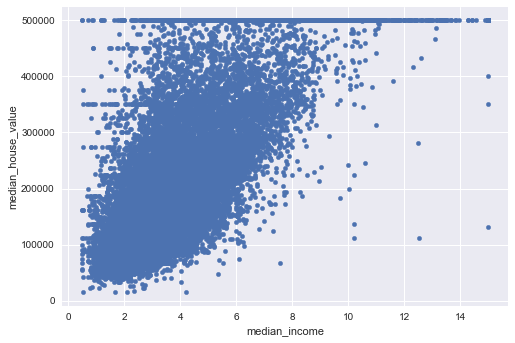

In [34]:
plt.style.use('seaborn')

df1.plot(x='median_income', y='median_house_value', kind='scatter')
plt.show()

The plot shows a fairly strong positive relationship between
median income and median house values.

Specifically, with more income levels of households, they are able to purchase more expensive shelters.

Given the plot, choosing a linear model to describe this relationship
seems like a reasonable assumption.

We can write our model as

$$
{medianHouseValue}_i = \beta_0 + \beta_1 {medianIncome}_i + u_i
$$

where:

- $ \beta_0 $ is the intercept of the linear trend line on the
  y-axis  
- $ \beta_1 $ is the slope of the linear trend line, representing
  the *marginal effect* of median income level on median house value  
- $ u_i $ is a random error term (deviations of observations from
  the linear trend due to factors not included in the model)  

To estimate the constant term $ \beta_0 $, we need to add a column
of 1’s to our dataset (consider the equation if $ \beta_0 $ was
replaced with $ \beta_0 x_i $ and $ x_i = 1 $)

In [35]:
df['const'] = 1
reg1 = sm.OLS(endog=df['median_house_value'], exog=df[['const','median_income']],missing='drop')
results = reg1.fit()
type(results)

NameError: name 'sm' is not defined

In [ ]:
print(results.summary())

From our results, we see that

- The intercept $ \hat{\beta}_0 = 45090 $.  It means when all other vairbales equal to 0, the housing prices 45090 US dollars
- The slope $ \hat{\beta}_1 = 41790 $.  This is the estimated coefficient of the median income. when holding other vairables constant,This denotes that a one more unit increase in the income levels will increase the median housing prices by 41790 US dollars
- The positive $ \hat{\beta}_1 $ parameter estimate implies that.
  income levels anticipate higher housing prices, as
  we saw in the figure.  
- The p-value of 0.000 for $ \hat{\beta}_1 $ implies that the
  effect of median housing value is statistically significant (using p <
  0.05 as a rejection rule).  
- The R-squared value of 0.473 indicates that around 61% of variation
  in median house values is explained by median income.  


Using our parameter estimates, we can now write our estimated
relationship as

$$
\widehat{MedianHouseValue}_i = 45090 + 41790 \ {MedianIncome}_i
$$

This equation describes the line that best fits our data, as shown in
Figure 2.

We can use this equation to predict the level of housing prices for
a value of the income levels.

The median income variable is significant for the model since the p-value is less than 0.05. However, the model has disadvantages, the model does not describe the true value accurately, since the R is only 0.473.

Plotting the predicted values against $ {MedianIncome}_i $ shows that the
predicted values lie along the linear line that we fitted above.

The observed values of $ {MedianHouseValue}_i $ are also plotted for
comparison purposes

In [ ]:
fix, ax = plt.subplots()
ax.scatter(df['median_income'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df['median_income'], df['median_house_value'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()

### Regression 2 startups and log_price

In [ ]:
plt.style.use('seaborn')

df27_subset.plot(x='startups', y='log_price', kind='scatter')
plt.show()

The plot shows no relationship between
startups and log_price.

Specifically, with more number of startups, the housing prices are almost not affected.

This is not consistent with the causation we previously look at. Previously, we found there exists relationship between the number of startups and housing prices. Specifically, we intuitively believe that the regions with more number of startups, the housing prices are also high. Now, let's further explore the relationships by the linear regression model.

Given the plot, choosing a linear model to describe this relationship
seems like a reasonable assumption.

We can write our model as

$$
{logPrice}_i = \beta_0 + \beta_1 {startups}_i + u_i
$$

where:

- $ \beta_0 $ is the intercept of the linear trend line on the
  y-axis  
- $ \beta_1 $ is the slope of the linear trend line, representing
  the *marginal effect* of startups on log housing prices  
- $ u_i $ is a random error term (deviations of observations from
  the linear trend due to factors not included in the model)  

In [ ]:
df27_subset

In [ ]:
df27_subset = df27.dropna(subset=['median_income', 'population','median_house_value'])
startuplog_house_value = np.log(df27_subset['median_house_value'])
df27_subset["log_price"] = startuplog_house_value
df27_subset['const'] = 1

reg3 = sm.OLS(endog=df27_subset['log_price'], exog=df27_subset[['const','startups']],missing='drop')
results3 = reg3.fit()
type(results3)
print(results3.summary())

From our results, we see that

- The intercept $ \hat{\beta}_0 = 11.9334 $.  It means when all other vairbales equal to 0, the log housing price is 11.9334 US dollars
- The slope $ \hat{\beta}_1 = 0.0002 $.  This is the estimated coefficient of the startups. when holding other vairables constant,This denotes that a one more unit increase in the number of startups will increase the median housing prices by 0.02 percent.
- The small positive $ \hat{\beta}_1 $ parameter estimate implies that.
  The more number of startups anticipate very low increase in log housing prices.  
- The p-value of 0.011 for $ \hat{\beta}_1 $ implies that the
  effect of startups is statistically significant (using p <
  0.05 as a rejection rule).  
- The R-squared value of 0.201 indicates that around 20.1% of variation
  in log_price is explained by startups.  


Using our parameter estimates, we can now write our estimated
relationship as

$$
\widehat{logPrice}_i = 11.9334 + 0.0002 \ {startups}_i
$$

This equation describes the line that best fits our data, as shown in
Figure 3.


The startups variable is significant for the model since the p-value is less than 0.05. However, the model has disadvantages, the model does not describe the true value accurately, since the R is only 0.201.

Plotting the predicted values against $ {startups}_i $ shows that the
predicted values lie along the linear line that we fitted above.

The observed values of $ {log_price}_i $ are also plotted for
comparison purposes

In [ ]:
X = df27_subset['startups']
y = df27_subset['median_house_value']
labels = df27_subset['NAME']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i])) #set the coordinates of the labels

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([0,5000])
ax.set_ylim([0,400000])
ax.set_xlabel('Number of startups')
ax.set_ylabel('Housing prices in Calfornia 1990')
ax.set_title('Figure 2: OLS relationship between startups and housing prices')

plt.rcParams["figure.figsize"] = (17,10)
plt.show()

### Regression 3: Ocean_proximity and log_price

In this regression, i want to explore the relationships between the housing prices when it is closer to inland and not closer to inland. Not closer to inland simply means closer to ocean, or 1 hour less than ocean.

In this situation, since ocean_proximity is a categorical variable, thus i have make use of dummy variable. 

In [ ]:
dfregocean = df.loc[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] =='INLAND')]

In [ ]:
X = dfregocean[['ocean_proximity']]
X = pd.get_dummies(data=X, drop_first=True)
#Y = np.log(dfregocean['median_house_value'])
dfregocean["log_price"] = Y


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,Y_train)

In [ ]:
predictions = model.predict(X_test)

We can write our model as

$$
{logPrice}_i = \beta_0 + \beta_1 {ocean_proximity}_i + u_i
$$

where:

- $ \beta_0 $ is the intercept of the linear trend line on the
  y-axis  
- $ \beta_1 $ is the slope of the linear trend line, representing
  the *marginal effect* of ocean_proximity INLAND on log housing prices  
- $ u_i $ is a random error term (deviations of observations from
  the linear trend due to factors not included in the model)

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

From our results, we see that

- ocean_proximity_INLAND is the dummy variable, where 1 represents the house is located in inland, and 0 represents the house is located not in inland.
- The intercept $ \hat{\beta}_0 = 12.2974 $.  It means when all other vairbales equal to 0, the log housing price is 12.2974 US dollars
- The slope $ \hat{\beta}_1 = -0.6899 $.  This is the estimated coefficient of the ocean_proximity. The coefficent of the dummmy variable is -0.6899, it represents the median housing prices in inland were about 69% lower, compared with the median housing prices not in inland.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that.
  The closer houses to inland, it anticipates decrease in log housing prices.  
- The p-value of 0.000 for $ \hat{\beta}_1 $ implies that the
  effect of ocean_proximity is statistically significant (using p <
  0.05 as a rejection rule).  
- The R-squared value of 0.360 indicates that around 36% of variation
  in log_price is explained by ocean_proximity  


Using our parameter estimates, we can now write our estimated
relationship as

$$
\widehat{logPrice}_i = 12.2974 -0.6899 \ {ocean_proximityINLAND}_i
$$


The ocean_proximity variable is significant for the model since the p-value is less than 0.05. However, the model has disadvantages, the model does not describe the true value accurately, since the R is only 0.360. There are only 36% of the data are explained by the model.


### Running multiple regressions model all together and compare which is better

In [ ]:
df27['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'median_income']
X2 = ['const', 'median_income', 'startups']
X3 = ['const', 'median_income', 'startups','population']
X4 = ['const', 'median_income', 'startups', 'GrowthRate','population']

# Estimate an OLS regression for each set of variables
reg11 = sm.OLS(df27['median_house_value'], df27[X1], missing='drop').fit()
reg22 = sm.OLS(df27['median_house_value'], df27[X2], missing='drop').fit()
reg33 = sm.OLS(df27['median_house_value'], df27[X3], missing='drop').fit()
reg44 = sm.OLS(df27['median_house_value'], df27[X3], missing='drop').fit()

In [ ]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [ ]:
results_table44 = summary_col(results=[reg11,reg22,reg33,reg44],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'median_income',
                                             'startups',
                                             'population',
                                             'GrowthRate'])

#results_table.add_title('Table 2 - OLS Regressions')

print(results_table44)

This shows model 4 is better above all, since the R square is the high, there are 85% of the data are captured by the model, and it can explain multivariate models at once.

### Regression 4: multivariate regression: log_price, median_income, logstups, population and GrowthRate

We can write our model as

$$
{logPrice}_i = \beta_0 + \beta_1 {medianIncome}_i + \beta_2 {logstups}_i+ \beta_3 {population}_i+\beta_4 {GrowthRate}_i+ u_i
$$

where:

- $ \beta_0 $ is the intercept of the linear trend line on the
  y-axis  
- $ \beta_1 $ is the slope of the linear trend line, representing
  the *marginal effect* of median Income on log housing prices  
- $ \beta_2 $ is the slope of the linear trend line, representing
  the *marginal effect* of logstups on log housing prices
- $ \beta_3 $ is the slope of the linear trend line, representing
  the *marginal effect* of population on log housing prices
- $ \beta_4 $ is the slope of the linear trend line, representing
  the *marginal effect* of population growth rate on log housing prices
- $ u_i $ is a random error term (deviations of observations from

  the linear trend due to factors not included in the model)

In [ ]:
log_startups = np.log(df27_subset['startups'])
df27_subset["logstups"] = log_startups
reg5 = sm.OLS(endog=df27_subset['log_price'], exog=df27_subset[['const', 'median_income', 'logstups','population', 'GrowthRate']],missing='drop')
results5 = reg5.fit()
type(results5)
print(results5.summary())

From our results, we see that

- The intercept $ \hat{\beta}_0 = 11.2975 $.  It means when all other vairbales equal to 0, the log housing price is 11.2975 US dollars
- The slope $ \hat{\beta}_1 = 0.2362 $.  This is the estimated coefficient of the median_income. The coefficent of the variable is 0.2362, when holding other vairables constant, this indicate that a one more unit increase in the median income will increase the median housing prices by 23.62 percent.
- The slope $ \hat{\beta}_2 = 0.1009 $.  This is the estimated coefficient of the log of the number of startups. The coefficent of the variable is 0.1009, when holding other vairables constant,this indicate that a one more unit increase in the median income will increase the median housing prices by 10.09 percent.
- The slope $ \hat{\beta}_3 = -0.0002 $.  This is the estimated coefficient of the population. The coefficent of the  variable is -0.0002, this indicate that a one more unit increase in the population will decrease the median housing prices by 0.02 percent.
- The slope $ \hat{\beta}_4 = -0.0134 $.  This is the estimated coefficient of the population growth rate. The coefficent of the variable is -0.0134, when holding other vairables constant,this indicate that a one more unit increase in the population growth rate will decrease the median housing prices by 1.34 percent.
- The p-value of 0.000 for $ \hat{\beta}_1 $ implies that the
  effect of median income is statistically significant (using p <
  0.05 as a rejection rule).  
- The p-value of 0.000 for $ \hat{\beta}_2 $ implies that the
  effect of logstups is statistically significant (using p <
  0.05 as a rejection rule).
- The p-value of 0.123 for $ \hat{\beta}_3 $ implies that the
  effect of population is not statistically significant (using p <
  0.05 as a rejection rule).
- The p-value of 0.183 for $ \hat{\beta}_4 $ implies that the
  effect of GrowthRate is not statistically significant (using p <
  0.05 as a rejection rule).
- The R-squared value of 0.686 indicates that around 68.6% of variation
  in log_price is explained by medianIncome, logstups, Population and growthRate  


Using our parameter estimates, we can now write our estimated
relationship as

$$
\widehat{logPrice}_i = 11.2975 +0.2362 \ {MedianIncome}_i+0.1009 \ {logstups}_i-0.0002 \ {population}_i-0.0134 \ {GrowthRate}_i
$$


The population and growthrate variable are not significant for the model since the p-value is higher than 0.05. So i fail reject the null hypothesis. Besides, the model has some improvement compared with linear simple regression, the model does not describe the true value very accurately, since the R is 68.6. There are only 68.6% of the data are explained by the model. Which is better than previous models.

### Regression 5: IV regression

## Endogeneity

As AJR (2001) paper discusses, the OLS models likely suffer from
**endogeneity** issues, resulting in biased and inconsistent model
estimates.

Namely, there isn't likely a two-way relationship between the number of startups and housing prices:

With reference on Lakshmi Balasubramanyan and Edward Coulson's paper:
- Housing prices were high in metropolitans in California in 1990.
- There were more number of startups in those metropolitan areas later at the beginning of 21th century.
- There is no relation between the number of startups and log housing prices.
- In the second model of simple linear regression, we found the coefficient is only 0.0002, and we observe that there no relations.


To deal with endogeneity, we can use **two-stage least squares (2SLS)
regression**, which is an extension of OLS regression.

This method requires replacing the endogenous variable
$ {medianIncome}_i $ with a variable that is:

1. correlated with $ {MedianIncome}_i $  
1. not correlated with the error term (ie. it should not directly affect
  the dependent variable, otherwise it would be correlated with
  $ u_i $ due to omitted variable bias)  


The new set of regressors is called an **instrument**, which aims to
remove endogeneity in our proxy of institutional differences.

I include a model which runs the log_price and median_income before doing IV regression, so that in the later part we can compare the second stage of IV regression and the one before IV regression.

In [ ]:

reg_beforeiv = sm.OLS(endog=df27_subset['log_price'], exog=df27_subset[['const','median_income']],missing='drop')
results_beforeiv = reg_beforeiv.fit()
type(results_beforeiv)
print(results_beforeiv.summary())

The coefficient is 0.2883, p-value is 0.000, R-squared is 0.395

In [ ]:
Xiv = np.log(df27_subset['startups'])
yiv = (df27_subset['median_income'])
labels = df27_subset['NAME']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(Xiv, yiv, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (Xiv.iloc[i], yiv.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(Xiv),
         np.poly1d(np.polyfit(Xiv, yiv, 1))(np.unique(Xiv)),
         color='black')

ax.set_xlim([0,10])
ax.set_ylim([0,8])
ax.set_xlabel('Log number of startups')
ax.set_ylabel('Median income of households')
ax.set_title('Figure 3: First-stage relationship between the log number of startups and income levels')
plt.show()

The second condition may not be satisfied if settler number of startups in California have a direct effect on the housing prices.

For example, with higher number of startups in the regions, the housing prices are directly high because of that

From the second model this is unlikely because:

- There are no positive relations between the housing prices and number of startups
- The higher housing prices is not the product of higher number of starups, the medium has to be something.


As we appear to have a valid instrument, we can use 2SLS regression to
obtain consistent and unbiased parameter estimates.

**First stage**

The first stage involves regressing the endogenous variable
($ {medianIncome}_i $) on the instrument.

The instrument is the set of all exogenous variables in our model (and
not just the variable we have replaced).

Using model 1 as an example, our instrument is simply a constant and
settler mortality rates $ {logstups}_i $.

Therefore, we will estimate the first-stage regression as

$$
{median_income}_i = \delta_0 + \delta_1 {logstups}_i + v_i
$$


In [ ]:
log_startups = np.log(df27_subset['startups'])
df27_subset["logstups"] = log_startups

results_iv = sm.OLS(df27_subset['median_income'],
                    df27_subset[['const', 'logstups']],
                    missing='drop').fit()
print(results_iv.summary())

- The slope $ \hat{\beta}_1 = 0.1810 $.  This is the estimated coefficient of the log of the number of startups. The coefficent of the variable is 0.1810, when holding other vairables constant,It represents 1 percentage change in startups in the region, will result 0.18 change the amount of median income that households received in tens thousands dollars.
- The p-value of 0.027 for $ \hat{\beta}_4 $ implies that the
  logstups is  statistically significant (using p <
  0.05 as a rejection rule).
- The R-squared value of 0.157 indicates that around 68.6% of variation
  in median income is explained by logstups.  

**Second stage**

We need to retrieve the predicted values of $ {medianincome}_i $ using
`.predict()`.

We then replace the endogenous variable $ {medianincome}_i $ with the
predicted values $ \widehat{medianincome}_i $ in the original linear model.

Our second stage regression is thus

$$
{logprice}_i = \beta_0 + \beta_1 \widehat{medianincome}_i + u_i
$$

In [ ]:
df27_subset['predicted_median_income'] = results_iv.predict()

results_ivv = sm.OLS(df27_subset['log_price'],
                    df27_subset[['const', 'predicted_median_income']]).fit()
print(results_ivv.summary())

- The slope $ \hat{\beta}_1 = 0.7940 $.  This is the estimated coefficient of the predicted median incomes. The coefficent of the variable is 0.7940,when holding other vairables constant, It represents one more unit increase in predicted median income will increase the median housing prices by 79.4%.
- The p-value of 0.000 for $ \hat{\beta}_4 $ implies that the
  predicted_median_income is  statistically significant (using p <
  0.05 as a rejection rule).
- The R-squared value of 0.472 indicates that around 47.2% of variation
  in log housing prices is explained by predicted median income.  

The second-stage regression results give us an unbiased and consistent
estimate of the effect of institutions on economic outcomes.

The result suggests a stronger positive relationship than what the OLS
results indicated.

Note that while our parameter estimates are correct, our standard errors
are not and for this reason

In [ ]:
iv = IV2SLS(dependent=df27_subset['log_price'],
            exog=df27_subset['const'],
            endog=df27_subset['median_income'],
            instruments=df27_subset['logstups']).fit(cov_type='unadjusted')

print(iv.summary)

- With the IV regression, i am able to conclude two main causations. First one is more number of startups make higher income levels in the regions. The second one is, with higher income levels, households can purchase more expensive shelters.
- This is consistent with our economic intuitions previously. From the paper discussed above, we found the regions with more number of startups tend to be more population-densed, income levels and housing prices at these regions are the highest compared with other areas. 
- Those regions in the California are San Diego, Los Angeles, Orange, Santa Barbara, Santa Clara, San Mateo, Alameda, San Francisco. That's the reason why people call these areas the metropolitan.

### Machine Learing

- For each region, solve  


$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

- Repeat with each of the two smaller rectangles.  
- Stop when $ |R| = $ some chosen minimum size or when depth of tree $ = $
  some chosen maximum.  
- Prune tree.  


$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

In [ ]:
df_ml= df.dropna()
X_ml = df_ml.drop(["ocean_proximity"], axis=1).copy()
y_ml = df_ml["log_price"] 
# convert everything to be a float for later on
for col in list(X_ml):
    X_ml[col] = X_ml[col].astype(float)

In [ ]:
from sklearn import tree
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_ml,y_ml)

In [ ]:
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X_ml)

# find the error of prediction (MSE)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_ml, y_pred_tree))

In [ ]:
sqrf_fig = plt.figure(figsize=(20,15))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X_ml.columns, filled=True,fontsize=15)

## Conclusion

### In this report, i mainly explained the relationship between housing features, incomes of households and housing values.

 More specifically, i divided houseing features into: <span style='color:blue'>Housing ages, Housing capacity and Location away from the ocean </span>, where i define housing capacity as how many rooms were there per house within a block.

#### Findings for links between housing features and housing prices:

- <span style='color:blue'> Housing prices were the highest on island, and lowest on inland. Starting from inland areas, it got more expensive when near the ocean.</span>
- Although the housing capacity got lower when it got closer to the ocean, the values of the houses were expensive, 12.88% of households decided to live near the ocean.
- Almost half of the households in California lived 1 hour less than the ocean. For households who lived there, their average incomes were the highest compared with other regions(island, inland), and they spent the second lowest money on purchasing the houses.

- <span style='color:blue'> Other housing features: housing ages, housing capacity, did not have large influences on housing prices</span>
- Housing prices varied when average capacity and housing ages varied.

The main finding of the paper is: With the geographical and historical advantages, some areas are the key observations for the investors. Investor made investments and new businesses in those areas, they hire more labor and spend more money on building the business and factories. With better investment and job opportunities, highly-educated people are attracted into these regions. Besides, other companies come in, and population gets higher. Meanwhile, housing markets seize the opportunities, they attract more households by spending more money on building comfortable and desirable shelters. Eventually, the business market and housing markets run into monopolistic competitions, where they need to compete and continue to improve their attractions for investors and works. Housing prices are the result of this competition and transformation. So housing prices are not only determined by income levels and various housing characteristics, but also determined by the number of startups indirectly.

#### Next steps and future thoughts:

- The housing prices and income levels are high in urban areas like Los Angeles, and by taking all the factors into considerations, i found the most crucial factor to affect and anticipate the housing prices is the income levels.
- To explain, people with higher income levels will no longer take other housing features into considerations, they do not care about the size of the house or how crowded it is near their areas, they focus more about how comfortable and urban they live in.
- Besides, since the world is improving, people can get higher wages and live in a better lifestyles, the productivities and technology improvement are very high and advanced. With this in mind, People have more disposable incomes to consume, they have higher demand and expectations to buy more expensive houses. Therefore, i conclude that income levels is the most important indicator for changes in housing prices, and economists can pay more attention about the changes in income levels to anticipate the changes in housing prices.
- In the future, i think i can also take considerations about the inflation, and GDP in each counties. Since with higher income levels, the inflation rate and GDP would definitely increase, then i see whether there are relations between the inflation rate and housing prices, as well as interest rate and housing prices.

### To conclude, this report revealed the most important factor to anticipate the housing prices: Income levels. It also provided discoveries about housing features, income levels and housing prices in California in 1990, although the data was long ago from us, the findings in this report provide information for expecting housing values nowadays. What’s more, with references to literature review and external datasets about startups, several causations have been made in this paper. With various map visualizations and comparisons, the intuitive relationships have been made. After that, the paper uses the regression model to further prove the relationships with high confidences. Housing prices are not only determined by income levels and various housing characteristics, but also determined by other economic factors, like the number of startups and inflation rate indirectly.

### Citations:

- Nugent, C. (2018, January 15). California Cities Dataset. Kaggle. Retrieved March 4, 2022, from https://www.kaggle.com/camnugent/california-housing-feature-engineering?select=cal_populations_county.csv 
- US census's website. Index of /Geo/Tiger/TIGER2019. (n.d.). Retrieved March 4, 2022, from https://www2.census.gov/geo/tiger/TIGER2019/ 
- Balasubramanyan, Lakshmi & Coulson, N.. (2013). Do house prices impact business starts?. Journal of Housing Economics. 22. 36–44. 10.1016/j.jhe.2013.01.001. 
- Population of counties in California (2022). (n.d.). Retrieved April 16, 2022, from https://worldpopulationreview.com/us-counties/states/ca 
- Cirtautas, J. (2019, December 2). Startup investments. Kaggle. Retrieved April 16, 2022, from https://www.kaggle.com/datasets/justinas/startup-investments 
- Collins, G. (2022, February 22). California Housing Market Report &amp; Predictions. ManageCasa. Retrieved April 16, 2022, from https://managecasa.com/articles/california-housing-market-report/ 
- SOCR data 021708 earthquakes. Socr RSS. (n.d.). Retrieved April 16, 2022, from http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_021708_Earthquakes 
- 	van Doorn, L., Arnold, A., Rapoport, E. (2019). In the Age of Cities: The Impact of Urbanisation on House Prices and Affordability. In: Nijskens, R., Lohuis, M., Hilbers, P., Heeringa, W. (eds) Hot Property. Springer, Cham. 
- 	Picker, L. (2006). How do house prices affect consumption? NBER. Retrieved April 16, 2022, from https://www.nber.org/digest/feb06/how-do-house-prices-affect-consumption
- 	Pettinger, T., & Robinson, E. (2021, September 10). How the housing market affects the economy. Economics Help. Retrieved April 16, 2022, from https://www.economicshelp.org/blog/21636/housing/how-the-housing-market-affects-the-economy/
